In [64]:
import pandas
import configparser
import psycopg2

In [65]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [70]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [71]:
sql = 'select * from student'

In [72]:
df = pandas.read_sql_query(sql,conn)
df[:]

,s_email,s_name,major
0,s2@jmu.edu,s2,IA
1,s3@jmu.edu,s3,ISAT
2,s4@jmu.edu,s4,ISAT
3,s1@jmu.edu,s1,IA
4,s5@jmu.edu,s5,GS


In [73]:
sql_q2 = """
        select professor.p_name, course.c_name
        from professor
        inner join course
        on professor.p_email = course.p_email
        """


In [74]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,p3,facebook
1,p3,postgresql
2,p3,twitter
3,p4,linkedin
4,p4,mongodb


In [75]:
sql_q3 = """
        select count(*) as num_student, c_number
        from enroll
        group by c_number
        """

<AxesSubplot:xlabel='c_number'>

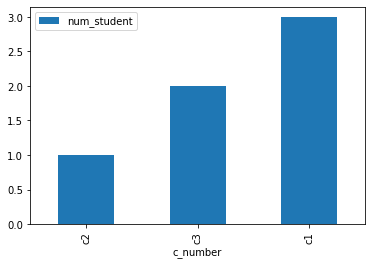

In [76]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(x='c_number', y='num_student')

In [77]:
sql = """
    select professor.p_name,count(*) as num_course
    from professor
    inner join course
    on professor.p_email = course.p_email
    group by professor.p_name
    """

<AxesSubplot:xlabel='p_name'>

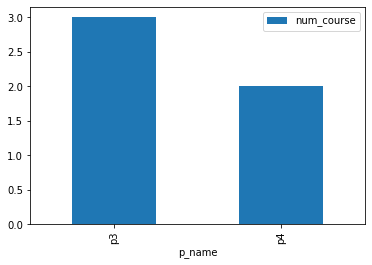

In [78]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name', y='num_course')

In [79]:
sql = """
        insert into student(s_email,s_name,major)
    values('{}','{}','{}')
    """.format('s5@jmu.edu','s5','GS')
print(sql)


        insert into student(s_email,s_name,major)
    values('s5@jmu.edu','s5','GS')
    


In [80]:
cur = conn.cursor()

In [81]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "student_pkey"
DETAIL:  Key (s_email)=(s5@jmu.edu) already exists.


In [82]:
conn.commit()

In [83]:
conn.rollback()

In [84]:
df=pandas.read_sql_query('select * from student', conn)
df[:]

,s_email,s_name,major
0,s2@jmu.edu,s2,IA
1,s3@jmu.edu,s3,ISAT
2,s4@jmu.edu,s4,ISAT
3,s1@jmu.edu,s1,IA
4,s5@jmu.edu,s5,GS


In [85]:
conn.rollback()

In [86]:
sql = """
     insert into professor(p_email,p_name,office)
     values('{}','{}','{}')
""".format('p4@jmu.edu','p4','o4')
print(sql)


     insert into professor(p_email,p_name,office)
     values('p4@jmu.edu','p4','o4')



In [87]:
cur=conn.cursor()

In [88]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(p4@jmu.edu) already exists.


In [89]:
conn.commit()

In [90]:
df=pandas.read_sql_query('select * from professor',conn)

df[:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4


In [91]:
sql = """
     insert into course (c_number,c_name,room,p_email)
     values('{}','{}','{}','{}')
""".format('c5', 'linkedin','r2','p4@jmu.edu')
print(sql)


     insert into course (c_number,c_name,room,p_email)
     values('c5','linkedin','r2','p4@jmu.edu')



In [92]:
cur=conn.cursor()

In [93]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "course_pkey"
DETAIL:  Key (c_number)=(c5) already exists.


In [94]:
conn.commit()

In [95]:
df=pandas.read_sql_query('select * from course',conn)

df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [96]:
sql = """
    update course
    set p_email = '{}'
    where p_email = '{}'
""".format('p4@jmu.edu','p2@jmu.edu')

In [97]:
cur.execute(sql)

In [98]:
conn.rollback()

In [56]:
df=pandas.read_sql_query('select * from course',conn)

df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [57]:
sql = """
delete from professor
where p_email='{}'
""".format('p2@jmu.edu')

In [58]:
cur.execute(sql)

In [59]:
conn.commit()

In [60]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4


In [61]:
cur.close()
conn.close()